# Prediksi Harga Rumah menggunakan Algoritma Random Forest

**1. Load dataset**

In [ ]:
#import semua library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import joblib

%matplotlib inline

In [ ]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

# Ambil nama file dari dictionary hasil upload
file_name = list(uploaded.keys())[0]

# Baca file csv
data = pd.read_csv(file_name, header=0)

Saving HARGA RUMAH JAKSEL_clean.csv to HARGA RUMAH JAKSEL_clean.csv


In [ ]:
data.head()

,Harga,LuasTanah,LuasBangunan,JumlahKamarTidur,JumlahKamarMandi,Garasi,Kota
0,2.800000e+10,1100,700,5,6,ADA,JAKSEL
1,1.900000e+10,824,800,4,4,ADA,JAKSEL
2,4.700000e+09,500,400,4,3,ADA,JAKSEL
3,4.900000e+09,251,300,5,4,ADA,JAKSEL
4,2.800000e+10,1340,575,4,5,ADA,JAKSEL


**2. Data understanding**

In [ ]:
data.dtypes

,0
Harga,float64
LuasTanah,int64
LuasBangunan,int64
JumlahKamarTidur,int64
JumlahKamarMandi,int64
Garasi,object
Kota,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Harga             1000 non-null   float64
 1   LuasTanah         1000 non-null   int64  
 2   LuasBangunan      1000 non-null   int64  
 3   JumlahKamarTidur  1000 non-null   int64  
 4   JumlahKamarMandi  1000 non-null   int64  
 5   Garasi            1000 non-null   object 
 6   Kota              1000 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
data.describe()

,Harga,LuasTanah,LuasBangunan,JumlahKamarTidur,JumlahKamarMandi
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.749094e+10,530.972000,487.653000,4.459000,3.941000
std,2.079955e+10,531.129385,452.941456,2.005078,1.903981
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.787500e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,413.000000,4.000000,4.000000
75%,2.000000e+10,677.750000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


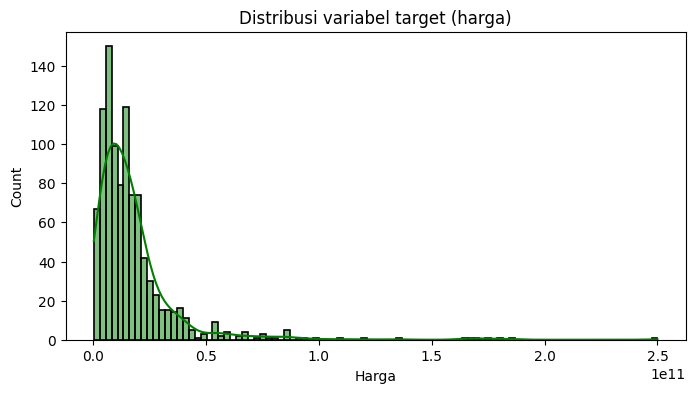

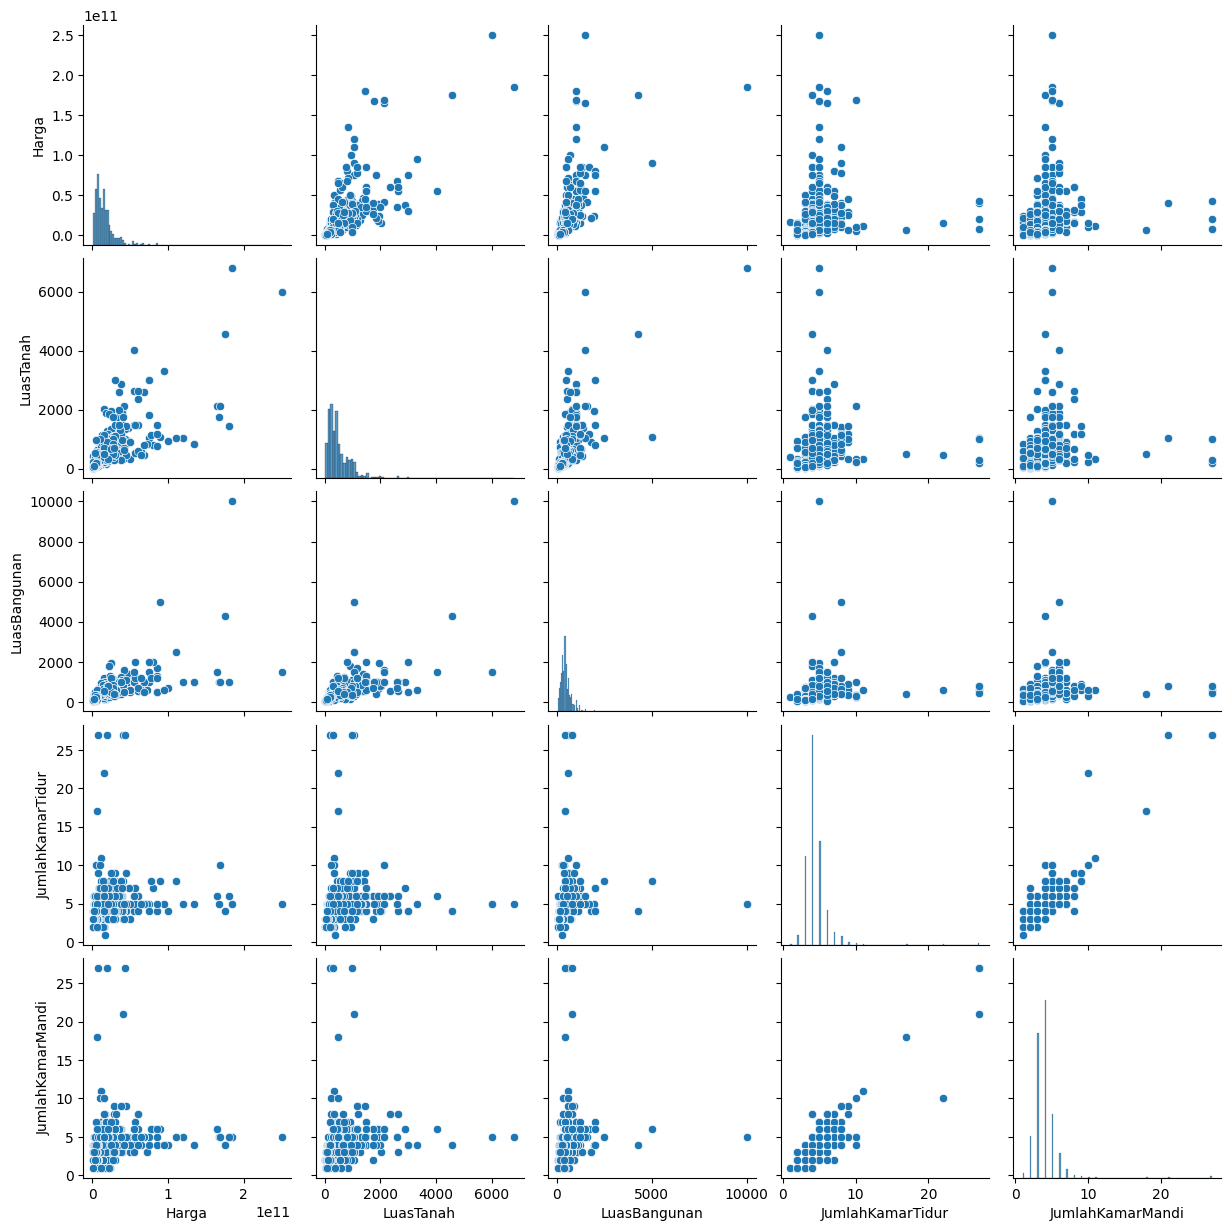

In [ ]:
def plot_price_distribution(data):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=data["Harga"], color='g', kde=True, edgecolor="black", linewidth=1.2)
    plt.title('Distribusi variabel target (harga)')
    plt.show()

def plot_pairplot(data):
    sns.pairplot(data)

# Pemanggilan
plot_price_distribution(data)

plot_pairplot(data)


**3. Data preprocessing**

Muhamad Fauzan Azhim (1305228114).

In [ ]:
def file(file_name):
  try:
    with open(file_name):
      return true
  except FileNotFoundError:
      return false

In [ ]:
class HousePricePreprocessor:
    def __init__(self, csv_path, cache_path):
        self.csv_path = csv_path
        self.cache_path = cache_path
        self.X = None
        self.y = None
        self.X_encoded = None

    def file_exists(self, filename):
        return Path(filename).is_file()

    def load_or_process_data(self):
        if self.file_exists(self.cache_path):
            self.X_encoded, self.y = joblib.load(self.cache_path)
        else:
            self._read_csv()
            self._prepare_data()
            self._encode_categorical()
            joblib.dump((self.X_encoded, self.y), self.cache_path)

    def _read_csv(self):
        self.data = pd.read_csv(self.csv_path)

    def _prepare_data(self):
        features = ["LuasTanah", "LuasBangunan", "JumlahKamarTidur", "JumlahKamarMandi", "Garasi", "Kota"]
        self.X = self.data[features]
        self.y = self.data["Harga"]

    def _encode_categorical(self):
        categorical_columns = ["Kota"]
        self.X_encoded = pd.get_dummies(self.X, columns=categorical_columns)

    def split_data(self, test_size=0.2, random_state=42):
        return train_test_split(self.X_encoded, self.y, test_size=test_size, random_state=random_state)


In [ ]:
import os
print(os.listdir())


['.config', 'HARGA RUMAH JAKSEL_clean.csv', 'sample_data']


In [ ]:
# Inisialisasi objek dari class
processor = HousePricePreprocessor(
    csv_path="HARGA RUMAH JAKSEL_clean.csv",
    cache_path = "preprocessed_data.joblib")

# Jalankan step-step preprocessing
processor._read_csv()
processor._prepare_data()
processor._encode_categorical()

# Split data dan simpan hasilnya
X_train, X_test, y_train, y_test = processor.split_data()

# Lihat hasil X_train
(X_train.head())


,LuasTanah,LuasBangunan,JumlahKamarTidur,JumlahKamarMandi,Garasi,Kota_JAKSEL
29,235,270,3,3,TIDAK ADA,True
535,358,500,4,5,ADA,True
695,693,474,5,4,ADA,True
557,600,450,4,4,ADA,True
836,470,1000,5,5,ADA,True


**4. Membangun Model Random Forest**

Lu’luil Maknun Ardiansyah (103052300071),

In [ ]:
import os
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

class HousePriceModelTrainer:
    def __init__(self, model_cache_dir="cache"):
        self.model_cache_dir = model_cache_dir
        self.rf_model_path = os.path.join(model_cache_dir, "rf_model_cache.joblib")
        os.makedirs(self.model_cache_dir, exist_ok=True)

    def model_exists(self):
        return os.path.exists(self.rf_model_path)

    def load_model(self):
        return joblib.load(self.rf_model_path)

    def train_model(self, X_train, y_train):
        if self.model_exists():
            print("Loading cached model...")
            return self.load_model()

        print("Training model with GridSearchCV...")
        param_grid = {
            "n_estimators": [50, 100],
            "max_depth": [5, 10],
            "min_samples_split": [5],
            "min_samples_leaf": [2],
        }

        grid_search = GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid,
            cv=10
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        print("Best parameters:", grid_search.best_params_)

        joblib.dump(best_model, self.rf_model_path)
        return best_model

In [ ]:
# Inisialisasi trainer
trainer = HousePriceModelTrainer()  # Ganti "cache" dengan direktori lain jika perlu

# Preprocessing data (seperti sebelumnya)
X_train = X_train.select_dtypes(include=['number'])
X_train = X_train.fillna(0)

# Training model
best_rf_model = trainer.train_model(X_train, y_train)

Training model with GridSearchCV...
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
import shutil
import os

# Hapus direktori cache sebelum training
if os.path.exists("cache"):
    shutil.rmtree("cache")

# Inisialisasi ulang trainer
trainer = HousePriceModelTrainer()

# Training model (akan memaksa membuat model baru)
best_rf_model = trainer.train_model(X_train, y_train)


Training model with GridSearchCV...
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


**4. Membangun Model XCB Regressor**

Bening Pastika (103052300097),

In [ ]:
import joblib
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import os

class XGBTrainer:
    def __init__(self, model_path):
        self.model_path = model_path

    def model_exists(self):
        return os.path.exists(self.model_path)

    def load_model(self):
        return joblib.load(self.model_path)

    def train_model(self, X_train, y_train):
        if self.model_exists():
            print("Loading cached XGB model...")
            return self.load_model()

        print("Training XGBRegressor model with GridSearchCV...")

        param_grid_xgb = {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.1, 0.01],
            "gamma": [0, 0.1],
        }

        grid_search_xgb = GridSearchCV(
            XGBRegressor(random_state=42),
            param_grid_xgb,
            cv=10
        )

        grid_search_xgb.fit(X_train, y_train)

        best_xgb_model = grid_search_xgb.best_estimator_
        print("Best parameters for XGBRegressor:", grid_search_xgb.best_params_)

        joblib.dump(best_xgb_model, self.model_path)
        return best_xgb_model


In [ ]:
xgb_model_path = "xgb_model_cache.pkl"
xgb_trainer = XGBTrainer(xgb_model_path)
best_xgb_model = xgb_trainer.train_model(X_train, y_train)

Training XGBRegressor model with GridSearchCV...
Best parameters for XGBRegressor: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
!rm xgb_model_cache.pkl

**5. Perbandingan Penggunaan Model**

Reggidya Elsa Serena Situmorang (103052330019),

In [ ]:
# Cek fitur yang digunakan saat training
print("Fitur saat training:", best_rf_model.feature_names_in_)

# Filter hanya fitur yang diperlukan
X_test = X_test[best_rf_model.feature_names_in_]

# Sekarang coba prediksi lagi
y_test_pred_rf = best_rf_model.predict(X_test)

Fitur saat training: ['LuasTanah' 'LuasBangunan' 'JumlahKamarTidur' 'JumlahKamarMandi']


In [ ]:
# Prediksi
y_train_pred_rf = best_rf_model.predict(X_train)
y_train_pred_xgb = best_xgb_model.predict(X_train)
X_train_combined = pd.DataFrame({
    "RF_Prediction": y_train_pred_rf,
    "XGB_Prediction": y_train_pred_xgb
})

y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_xgb = best_xgb_model.predict(X_test)

X_test_combined = pd.DataFrame({
    "RF_Prediction": y_test_pred_rf,
    "XGB_Prediction": y_test_pred_xgb
})

In [ ]:
# Meta model
meta_model = RandomForestRegressor(random_state=42)
meta_model.fit(X_train_combined, y_train)


RandomForestRegressor(random_state=42)

**6. Evaluasi Model**

Reggidya Elsa Serena Situmorang (103052330019),

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluasi
    print("Train RMSE:", mean_squared_error(y_train, y_train_pred, **{} ) ** 0.5)
    print("Test RMSE:", mean_squared_error(y_test, y_test_pred, **{} ) ** 0.5)
    print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
    print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
    print("Train R2:", r2_score(y_train, y_train_pred))
    print("Test R2:", r2_score(y_test, y_test_pred))


In [ ]:
def preprocess_numerical(df):
    return df.select_dtypes(include=['number']).fillna(0)


In [ ]:
X_train = preprocess_numerical(X_train)
X_test = preprocess_numerical(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Pastikan preprocessing sama dengan training
X_test = X_test.select_dtypes(include=['number'])
X_test = X_test.fillna(0)

# Buat prediksi dari dua model
X_test_combined = pd.DataFrame({
    "RF_Prediction": best_rf_model.predict(X_test),
    "XGB_Prediction": best_xgb_model.predict(X_test)
})

# Panggil evaluasi
evaluate_model(model=meta_model, X_train=X_train_combined, y_train=y_train, X_test=X_test_combined, y_test=y_test)


Train RMSE: 3739865556.0304465
Test RMSE: 12249832651.909843
Train MAE: 1969584267.4337525
Test MAE: 5508368127.085637
Train R2: 0.9701228536201472
Test R2: 0.4795801712073401


**7. Prediksi Menggunakan Input Data**

Reggidya Elsa Serena Situmorang (103052330019),

In [ ]:
best_rf_model.feature_names_in_


array(['LuasTanah', 'LuasBangunan', 'JumlahKamarTidur',
       'JumlahKamarMandi'], dtype=object)

In [ ]:
# Input prediksi baru
new_data = pd.DataFrame({
    "LuasTanah": [1248],
    "LuasBangunan": [1000],
    "JumlahKamarTidur": [8],
    "JumlahKamarMandi": [9],
})

# Step 1: Cek apakah semua fitur yang dibutuhkan tersedia di new_data
try:
    new_data = new_data[best_rf_model.feature_names_in_]
except KeyError as e:
    missing_cols = list(set(best_rf_model.feature_names_in_) - set(new_data.columns))
    print(f"Kolom berikut tidak ditemukan di new_data: {missing_cols}")
    raise

# Prediksi dari dua model dasar
try:
    new_data_rf = best_rf_model.predict(new_data)
    new_data_xgb = best_xgb_model.predict(new_data)
except Exception as e:
    print("Gagal melakukan prediksi pada model dasar:", e)
    raise

# Gabung dan prediksi akhir dari meta model
try:
    new_data_combined = pd.DataFrame({
        "RF_Prediction": new_data_rf,
        "XGB_Prediction": new_data_xgb
    })

    predicted_price = meta_model.predict(new_data_combined)
    print("Predicted house price:", predicted_price[0])
except Exception as e:
    print("Gagal melakukan prediksi akhir dengan meta model:", e)
    raise


Predicted house price: 156405000000.0
